# Data Wrangling

In this notebook, we import and explore the data, get rid of the outliers, and also wrangle the data into the format that is useful for further analysis.

## Loading modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Loading and exploring the data

Uploading 'RAW_recipes.csv' and 'RAW_interactions.csv' files from https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions into Pandas dataframes

In [2]:
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')

In [3]:
print("Recipes:",recipes.shape,",","Interactions:", interactions.shape)

Recipes: (231637, 12) , Interactions: (1132367, 5)


In [4]:
recipes.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [5]:
len(recipes['id'].unique())

231637

In [6]:
interactions.head(3)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [7]:
len(interactions['user_id'].unique())

226570

There are 231,637 unique recipe ids, represented by the equal number of rows in the recipes dataframe. The recipes are reviewed by 226,570 unique users, represented by 1,132,367 interactions (reviews) in the interactions dataframe

## Removing Irrelevant Data 

For the goals of the analysis for the capstone project we only need recipes that have over 10 reviews. To do this, we first explore the outliers with less than 10 reviews in the interactions dataframe :

In [8]:
s=interactions.groupby('recipe_id')['review'].count()
s.head(3)

recipe_id
38    4
39    1
40    9
Name: review, dtype: int64

Text(0.5, 1.0, 'Number of recipes by number of reviews')

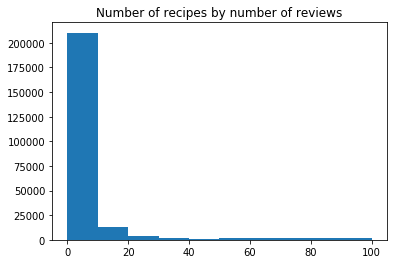

In [9]:
rs=s.reset_index()
rs.head(3)
plt.hist(rs.review, bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Number of recipes by number of reviews')

As the histogram shows, it turns out that there are a lot of recipes with less than 10 reviews. Specifically, there are 210,244 recipes with less than 10 reviews and 18,762 recipes with over 10 reviews, as shown in the code below:

In [10]:
recipesbelow10=s[s<10].sort_values()
print('Number of recipes with < 10 reviews:', len(recipesbelow10))
recipesover10=s[s>10].sort_values()
print('Number of recipes with > 10 reviews:', len(recipesover10))
type(recipesover10)

Number of recipes with < 10 reviews: 210244
Number of recipes with > 10 reviews: 18762


pandas.core.series.Series

We now need to create new dataframes for recipes with reviews over 10.

In [11]:
#filter recipes to include only the ones with over 10 reviews
recipes_df=recipes[recipes['id'].isin(recipesover10.index)].reset_index()
recipes_df.head(3)

,index,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,15,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7
1,16,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5
2,17,chinese candy,23933,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3


In [12]:
#filter reviews to include only the recipes with over 10 reviews
reviews_df=interactions[interactions['recipe_id'].isin(recipesover10.index)].reset_index()
reviews_df.head(3)

,index,user_id,recipe_id,date,rating,review
0,31,56680,79222,2006-11-11,5,"Oh, This was wonderful! Had a soup and salad ..."
1,43,183565,79222,2006-02-13,5,Wow! My family loves this recipe and it is a ...
2,44,101823,79222,2006-03-21,5,Excellent chowder. This was the perfect warm-...


In [13]:
len(recipes_df)

18762

In [14]:
len(reviews_df)

577837

## Missing Values

To check on misisng values, we loop over the columns of the dataframe and print the names of the columns where the Null values are present:

In [15]:
for col in recipes_df.columns:
        df = recipes_df[recipes_df[col].isnull()==True]
        if df.empty == False:
            print(col)
        else:
            continue

description


Turns out that there are 406 missing values in the description column:

In [16]:
len(recipes_df[recipes_df['description'].isnull()])

406

We decided to keep the recipes with missing descriptions in the dataframe for now.

## 0 Star Ratings

There are some reviews with rating of 0:

In [17]:
len(reviews_df[reviews_df.rating==0])/len(reviews_df)

0.05702992366359371

In [18]:
len(reviews_df.index[reviews_df.rating==0].unique())/reviews_df.index.nunique()

0.05702992366359371

In [19]:
reviews_df.set_index('recipe_id', inplace=True)

In [20]:
reviews_df.review[reviews_df.rating==0][34620].to_list()

['Very easy and so very delicious. A family favorite!!',
 'it&#039;s in the oven now...but i&#039;m not really impressed with the recipe instructions, could have been a little more informative like wait times',
 'Ok, today I make my first loaf of bread EVER!\nI will report the results!\nKind of surprised by margarine in the recipe. I didn&#039;t think anyone used that anymore. I&#039;ll use butter.',
 'I made this tonight...and made errors...I should have added extra flour before turning it out to be kneaded. Compensating made it messy..but after all was said and done...the bread turned out really delicious. The instructions could be modified to give more guidance to people without baking knowledge(like me)..... But again....I am sitting here eating a hot slice with butter on it....and I am very happy!',
 'followed the recipe and baked it in a traeger pellet grill. turned out perfect.']

0 star ratings are present for 58% of unique recipe ids and represent 6% of all the reviews in the reviews dataframe. <br>
By reading the reviews for 0 star ratings it is evident that some of them were meant to be a higher rating and were probably coded as 0 star by error. <br>
Nevertheless, we checked food.com where the reviews were collected, and the website allows 0 star ratings. So we will keep 0 star ratings in the reviews dataframe.

## Recipe Tags

For part 2 of EDA we want to investigate the tags column of the recipes dataframe. 

First, we want to create a list of unique tags:

In [21]:
# create a list of unique tags:
tags_list=[]
for i in range(0,len(recipes_df['tags'])):
    for val in recipes_df['tags'][i].strip('[]').strip(' ').split(','):
        if val in tags_list:
            continue
        else:
            tags_list.append(val)
print((tags_list[0:10]))

["'weeknight'", " 'time-to-make'", " 'course'", " 'main-ingredient'", " 'preparation'", " 'main-dish'", " 'pork'", " 'crock-pot-slow-cooker'", " 'dietary'", " 'meat'"]


In [22]:
# to double check that the tags in the list are indeeed unique:
tags_list=list(set(tags_list))

As it turns out below, the tags column in the recipes dataframe is similar to the ingredients column in that the individual values look like a list, but are actually strings:

In [23]:
type(recipes_df.tags[0])

str

### Tags Matrix

We want to create a dataframe that will look like a matrix of recipe ids in rows, all individual tags as columns with values being 1 if the ingredient is present in the recipe and 0 if not.

1) To do this, the first step is to add a column tags2 to the recipes dataframe where the values from the tags column are converted to a list:

In [24]:
# convert 'tags' column from string type to a list:
recipes_df['tags2']=recipes_df['tags'].apply(lambda x: x.split(','))
recipes_df.head(3)

,index,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2
0,15,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm..."
1,16,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou..."
2,17,chinese candy,23933,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou..."


2) Then we attach a column called tags_check to the recipes dataframe. This column contains a list of unique tags from all the recipes:

In [25]:
recipes_df['tags_check']=[tags_list for n in range(len(recipes_df))]
recipes_df.head(3)

,index,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2,tags_check
0,15,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm...","[ 'crusts-pastry-dough-2', 'april-fools-day',..."
1,16,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou...","[ 'crusts-pastry-dough-2', 'april-fools-day',..."
2,17,chinese candy,23933,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou...","[ 'crusts-pastry-dough-2', 'april-fools-day',..."


3) Now we create a function that runs through all the values in the tags_check column and replaces the tag value with 1 if it is present in the recipe and with 0 if it is not present. 

In [26]:
def tags_check(df, recid, taglist):
    taglist=[1 if tag in df['tags'][recid] else 0 for tag in taglist]
    return taglist

We test the function on one recipe id, "63986" (in order to do this, we first need to add the recipe id to the index of the recipes dataframe)

In [27]:
recipes_df = recipes_df.set_index('id')

In [28]:
tags_check(recipes_df, 63986, tags_list)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


4) We apply the tags_check function to the whole column tags_check using list comrehension to get to the individual tags level:

In [29]:
recipes_df['tags_check']=[tags_check(recipes_df, recipes_df.index[n], tags_list) for n in range(len(recipes_df))]
recipes_df.head(3)

,index,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2,tags_check
id,,,,,,,,,,,,,,
63986,15,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
43026,16,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
23933,17,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


5) We create the tags_matrix dataframe with rows as recipe ids, columns as the indidual recipe tags, and values as 1-s and 0-s for a particular recipe id-tag match from the tags_check column:

In [30]:
tags_matrix=pd.DataFrame(recipes_df['tags_check'].values.tolist(),
                        columns=[tag for tag in tags_list],
                        index=recipes_df.index)
tags_matrix.head(3)

,'crusts-pastry-dough-2','april-fools-day','marinades-and-rubs','turkish','oamc-freezer-make-ahead','gifts','cooking-mixes','indonesian','breads','60-minutes-or-less',...,'toddler-friendly','spreads','tropical-fruit','cauliflower','canning','15-minutes-or-less','mixer','chowders','pressure-canning','plums'
id,,,,,,,,,,,,,,,,,,,,,
63986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43026,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can doublecheck that the tags_matrix has correct values by comparing the output of the tags_matrix for one recipe id to the sum of tag values from the tags_check column of the recipes dataframe for the same recipe id:

In [31]:
sum(recipes_df['tags_check'][63986])

17

In [32]:
len(tags_matrix.loc[63986][tags_matrix.loc[63986]==1])

17

We now can use tags_matrix for further Capstone 1 analysis.

## Recipe Ingredients

For the third part of the EDA, we focus on the ingredients column of the recipes dataframe.

The data presented in the ingredients column looks like a list, but upon further investigation it actually turned out to be a string:

In [33]:
recipes_df.reset_index(inplace=True)

In [34]:
type(recipes_df.ingredients[0])

str

We now need to create a list of all ingredients from all the recipes without duplicates:

In [35]:
ingredients_list = []
for i in range(0,len(recipes_df['ingredients'])):
    for val in recipes_df['ingredients'][i].strip('[]').split(','):
        if val in ingredients_list:
            continue
        else:
            ingredients_list.append(val.strip(' '))
print('Number of unique ingredients:',len(ingredients_list))
print(sorted(ingredients_list[0:10]))

Number of unique ingredients: 148434
["'cheese'", "'chicken rice soup'", "'dry mustard'", "'egg roll wrap'", "'flour'", "'garlic powder'", "'lean pork chops'", "'oil'", "'salt'", "'whole green chilies'"]


The resulting ingredients list has 8,091 unique values. 

Upon further investigation, we found that there is a certain peculiarity about the ingredients names. Some ingredients names are simple like "flour", while the others are complex like "all-purpose flour". 

In [36]:
recipes_df.ingredients[recipes_df.ingredients.str.contains('flour')==True].head(5)

0     ['lean pork chops', 'flour', 'salt', 'dry must...
10    ['all-purpose flour', 'sugar', 'salt', 'baking...
16    ['butter', 'sugar', 'eggs', 'bananas', 'water'...
17    ['oreo cookie crumbs', 'butter', 'cream cheese...
18    ['flour', 'sugar', 'cocoa', 'baking soda', 'sa...
Name: ingredients, dtype: object

### Ingredients Matrix

Similar to the tags matrix, we want to create the ingredients matrix with recipe ids in rows, ingredients as columns with values being 1 if the ingredient is present in the recipe and 0 if not.

We know that the ingredients list has 8,091 unique values, so we need to limit thescope of the analysis only to the significant common ingredients. To see how often the ingredient shows up in recipes we create a dictionary of ingredients with an ingredient name as a key and a number of times the ingredient showed up in recipes as a value.

In [37]:
def clean_up(s):
    new_l =[]
    l = s.strip('[]').split(',')
    for val in l:
        new_val=val.strip(' ').strip("'")
        new_l.append(new_val)
    return new_l

In [38]:
recipes_df.reset_index(inplace=True)

In [39]:
clean_up(recipes_df['ingredients'][0])

['lean pork chops',
 'flour',
 'salt',
 'dry mustard',
 'garlic powder',
 'oil',
 'chicken rice soup']

In [40]:
recipes_df['ingredients2']=recipes_df['ingredients'].apply(clean_up)
recipes_df.head(3)

,level_0,id,index,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2,tags_check,ingredients2
0,0,63986,15,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[lean pork chops, flour, salt, dry mustard, ga..."
1,1,43026,16,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[egg roll wrap, whole green chilies, cheese, c..."
2,2,23933,17,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[butterscotch chips, chinese noodles, salted p..."


Create a list of all ingredients from all the recipes by adding values from the column ingredients2 together:

In [41]:
ingredients_list = recipes_df.ingredients2.sum()

Make a dictionary of unique ingredients by applying the Counter function on a non-unique ingredients list:

In [42]:
d = dict(Counter(ingredients_list))

Create a dictionary d10 that will only hold ingredients that were mentioned in the recipes x number of times:

In [43]:
d10 = {}
for key, value in d.items():
    if value > 100:
        d10[key]= value
    else:
        continue
print(len(d10),'\n', d10)

245 
 {'flour': 2565, 'salt': 7864, 'dry mustard': 238, 'garlic powder': 1316, 'oil': 934, 'cheese': 202, 'cornstarch': 699, 'water': 3095, 'onion': 3246, 'black pepper': 1245, 'worcestershire sauce': 756, 'milk': 2359, 'plain yogurt': 107, 'frozen chopped spinach': 113, 'egg': 1538, 'sharp cheddar cheese': 230, 'soy sauce': 870, 'honey': 738, 'garlic': 1860, 'green onions': 463, 'ground beef': 559, 'sugar': 3940, 'beer': 119, 'cayenne': 176, 'salt & pepper': 172, 'brown sugar': 1794, 'cinnamon': 1065, 'raisins': 288, 'butter': 5106, 'whipping cream': 197, 'powdered sugar': 412, 'vanilla extract': 841, 'all-purpose flour': 1625, 'baking soda': 1442, 'lemon': 446, 'vanilla': 1360, 'eggs': 2930, 'red wine vinegar': 237, 'fresh basil': 273, 'scallions': 150, 'bacon': 549, 'celery': 723, 'carrot': 494, 'olive oil': 2503, 'lean ground beef': 247, 'dry white wine': 187, 'oregano': 430, 'red pepper flakes': 244, 'nutmeg': 462, 'mayonnaise': 802, 'bananas': 233, 'ketchup': 374, 'fresh lemon ju

We decided to limit the dictionary of ingredients to ingredients that were present in 100 recipes or more. There are 245 ingredients like this.

For further exploration, we created a list of keys from d10 and sorted it in alphabetical order:

In [44]:
d10_list=list(d10.keys())
sorted(d10_list)

['"confectioners\' sugar"',
 'active dry yeast',
 'all-purpose flour',
 'almond extract',
 'apples',
 'bacon',
 'baking powder',
 'baking soda',
 'balsamic vinegar',
 'banana',
 'bananas',
 'barbecue sauce',
 'basil',
 'bay leaf',
 'bay leaves',
 'beef broth',
 'beer',
 'bell pepper',
 'black beans',
 'black olives',
 'black pepper',
 'blueberries',
 'boiling water',
 'boneless skinless chicken breast',
 'boneless skinless chicken breast halves',
 'boneless skinless chicken breasts',
 'bread',
 'bread flour',
 'breadcrumbs',
 'broccoli',
 'brown sugar',
 'butter',
 'buttermilk',
 'cabbage',
 'canola oil',
 'capers',
 'carrot',
 'carrots',
 'cayenne',
 'cayenne pepper',
 'celery',
 'celery ribs',
 'cheddar cheese',
 'cheese',
 'chicken',
 'chicken breasts',
 'chicken broth',
 'chicken stock',
 'chili powder',
 'chives',
 'chocolate chips',
 'cider vinegar',
 'cilantro',
 'cinnamon',
 'cocoa',
 'cocoa powder',
 'cold water',
 'cooked chicken',
 'cooked rice',
 'cooking oil',
 'cooking sp

Further exploration of the sorted list shows that there are some repeating ingredients with a slightly different names, e.g. carrot and carrots or garlick and fresh garlic. We will have to combine the outputs for these repeating ingredients later. 

Now we create the ingredients matrix similar way we created the tags matrix.

1) We attach a column called ingredients_check to the recipes dataframe. This column contains d10_list in every row:

In [45]:
recipes_df['ingredients_check']=[d10_list for n in range(len(recipes_df))]
recipes_df.head(3)

,level_0,id,index,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2,tags_check,ingredients2,ingredients_check
0,0,63986,15,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[lean pork chops, flour, salt, dry mustard, ga...","[flour, salt, dry mustard, garlic powder, oil,..."
1,1,43026,16,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[egg roll wrap, whole green chilies, cheese, c...","[flour, salt, dry mustard, garlic powder, oil,..."
2,2,23933,17,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[butterscotch chips, chinese noodles, salted p...","[flour, salt, dry mustard, garlic powder, oil,..."


2) Now we create a function that runs through all the values in the ingredients_check column and replaces the ingredient name with 1 if it is present in the recipe and with 0 if it is not present.

In [46]:
def ingredients_check(df, recid, i_list):
    i_list=[1 if ingredient in df['ingredients2'][recid] else 0 for ingredient in i_list]
    return i_list

We test the function on one recipe id, "63986" (in order to do this, we first need to add the recipe id to the index of the recipes dataframe)

In [47]:
recipes_df = recipes_df.set_index('id')

In [48]:
ingredients_check(recipes_df, 63986, d10_list)

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

3) We apply the ingredients_check function to the whole column ingredients_check using list comrehension to get to the individual tags level:

In [49]:
recipes_df['ingredients_check']=[ingredients_check(recipes_df, recipes_df.index[n], d10_list) for n in range(len(recipes_df))]
recipes_df.head(3)

,level_0,index,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2,tags_check,ingredients2,ingredients_check
id,,,,,,,,,,,,,,,,,
63986,0,15,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[lean pork chops, flour, salt, dry mustard, ga...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
43026,1,16,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[egg roll wrap, whole green chilies, cheese, c...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
23933,2,17,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[butterscotch chips, chinese noodles, salted p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


4) We create the ingredients_matrix dataframe with rows as recipe ids, columns as the individual recipe ingredients, and values as 1-s and 0-s for a particular recipe id-ingredient match from the ingredients_check column:

In [50]:
ingredients_matrix=pd.DataFrame(recipes_df['ingredients_check'].values.tolist(),
                        columns=[ingredient for ingredient in d10_list],
                        index=recipes_df.index)
ingredients_matrix.head(3)

,flour,salt,dry mustard,garlic powder,oil,cheese,cornstarch,water,onion,black pepper,...,elbow macaroni,yellow onion,red wine,fresh lime juice,fresh thyme,shallots,fresh rosemary,basil,rice vinegar,sesame seeds
id,,,,,,,,,,,,,,,,,,,,,
63986,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43026,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Further cleaning of ingredients_matrix

Now we need to get rid of the columns with similar ingredients. There are 3 types of similar ingredients that we will investigate:
1) Ingredient names in single and plural form
2) Ingredient names with the same first word in the name
3) Ingredient names with the same second word in the name

##### Ingredient names in single and plural form

In order to find columns with similar ingredients names, we create a list of pairs:

In [51]:
pairs_list=[]
for str in d10_list:
    if str+'s' in d10_list:
        pairs_list.append(str)
        pairs_list.append(str+'s')
    else:
        continue

print(pairs_list)

['onion', 'onions', 'egg', 'eggs', 'lemon', 'lemons', 'carrot', 'carrots', 'egg white', 'egg whites', 'garlic clove', 'garlic cloves', 'banana', 'bananas', 'scallion', 'scallions', 'green onion', 'green onions', 'boneless skinless chicken breast', 'boneless skinless chicken breasts', 'mushroom', 'mushrooms']


In [52]:
for str in d10_list:
    if str+'es' in d10_list:
        pairs_list.append(str)
        pairs_list.append(str+'es')
    else:
        continue
print(pairs_list)

['onion', 'onions', 'egg', 'eggs', 'lemon', 'lemons', 'carrot', 'carrots', 'egg white', 'egg whites', 'garlic clove', 'garlic cloves', 'banana', 'bananas', 'scallion', 'scallions', 'green onion', 'green onions', 'boneless skinless chicken breast', 'boneless skinless chicken breasts', 'mushroom', 'mushrooms', 'potato', 'potatoes']


We further convert the pairs_list into the tuples_list with similar ingredients in one tuple:

In [53]:
sublist1 = []
sublist2 = []
for i in range(0,len(pairs_list)):
    if i%2 !=0:
        sublist1.append(pairs_list[i])
    else:
        sublist2.append(pairs_list[i])
tuples_list = list(zip(sublist1,sublist2))
print(tuples_list)

[('onions', 'onion'), ('eggs', 'egg'), ('lemons', 'lemon'), ('carrots', 'carrot'), ('egg whites', 'egg white'), ('garlic cloves', 'garlic clove'), ('bananas', 'banana'), ('scallions', 'scallion'), ('green onions', 'green onion'), ('boneless skinless chicken breasts', 'boneless skinless chicken breast'), ('mushrooms', 'mushroom'), ('potatoes', 'potato')]


Now we need to use tuples_list and same_words list to unite the values of ingredients_matrix columns together. We do this by creating a function that:
1) adds values of two columns of the ingredients matrix together 
2) replaces the resulting values over 1 with 1

In [54]:
def unite_cols(df, col1, col2):
    df[col1] = df[col1] + df[col2]
    df[df[col1]>1] = 1
    return df[df.values>1]

In [55]:
for i in range(0,len(tuples_list)):
    unite_cols(ingredients_matrix, tuples_list[i][1],tuples_list[i][0])

In [56]:
len(ingredients_matrix.columns)

245

In [57]:
for i in sublist1:
    ingredients_matrix.drop(i, axis=1, inplace=True)
len(ingredients_matrix.columns)

233

We now reduced the number of columns from 245 to 233 by removing the repeating ingredients.

##### Ingredient names with the same first word in the name

We still need to deal with ingredients that have one word in common, like 'cilantro' and 'fresh cilantro'. 

In [58]:
list1 =[]
list2 =[]
list3 =[]
list4 =[]
for str in d10_list:
    if len(str.split(' '))>1:
        if str.split(' ')[0] in d10_list:
            list1.append(str)
            list2.append(str.split(' ')[0])
        elif str.split(' ')[1] in d10_list:
            list3.append(str)
            list4.append(str.split(' ')[1])
        else:
            continue

First, let's review the lists of ingredients where the first word is matching a different ingredient:

In [59]:
print(list1, '\n', list2)

['garlic powder', 'salt & pepper', 'vanilla extract', 'cream cheese', 'egg white', 'garlic cloves', 'garlic clove', 'lime juice', 'chicken breasts', 'lemon juice', 'garlic salt', 'salt and pepper', 'cayenne pepper', 'cocoa powder', 'cream of chicken soup', 'bread flour', 'celery ribs', 'egg yolks', 'cream of mushroom soup', 'chicken broth', 'flour tortillas', 'egg whites', 'chicken stock', 'onion powder', 'salt & freshly ground black pepper', 'lemon zest', 'rice vinegar'] 
 ['garlic', 'salt', 'vanilla', 'cream', 'egg', 'garlic', 'garlic', 'lime', 'chicken', 'lemon', 'garlic', 'salt', 'cayenne', 'cocoa', 'cream', 'bread', 'celery', 'egg', 'cream', 'chicken', 'flour', 'egg', 'chicken', 'onion', 'salt', 'lemon', 'rice']


We combine these ingredients in a list of tuples and observe the results:

In [60]:
tuples_list2=sorted(list(zip(list1, list2)))
for i in range(0,len(tuples_list2)):
    print(i,tuples_list2[i])   

0 ('bread flour', 'bread')
1 ('cayenne pepper', 'cayenne')
2 ('celery ribs', 'celery')
3 ('chicken breasts', 'chicken')
4 ('chicken broth', 'chicken')
5 ('chicken stock', 'chicken')
6 ('cocoa powder', 'cocoa')
7 ('cream cheese', 'cream')
8 ('cream of chicken soup', 'cream')
9 ('cream of mushroom soup', 'cream')
10 ('egg white', 'egg')
11 ('egg whites', 'egg')
12 ('egg yolks', 'egg')
13 ('flour tortillas', 'flour')
14 ('garlic clove', 'garlic')
15 ('garlic cloves', 'garlic')
16 ('garlic powder', 'garlic')
17 ('garlic salt', 'garlic')
18 ('lemon juice', 'lemon')
19 ('lemon zest', 'lemon')
20 ('lime juice', 'lime')
21 ('onion powder', 'onion')
22 ('rice vinegar', 'rice')
23 ('salt & freshly ground black pepper', 'salt')
24 ('salt & pepper', 'salt')
25 ('salt and pepper', 'salt')
26 ('vanilla extract', 'vanilla')


Upon observation, we remove the tuples that are not a similar ingredient from a list. We update tuples_list2 manually to include only the relevant tuples:

In [61]:
tuples_list2_df=pd.DataFrame(tuples_list2, columns=['long_name','short_name'])
len(tuples_list2_df)

27

In [62]:
removal=[0,4,7,8,9,10,11,12,13,15,18,20,21]
tuples_list2_df.drop([i for i in removal], inplace=True)
len(tuples_list2_df)

14

In [63]:
tuples_list2_df.reset_index(inplace=True)
tuples_list2_df.head(5)

,index,long_name,short_name
0,1,cayenne pepper,cayenne
1,2,celery ribs,celery
2,3,chicken breasts,chicken
3,5,chicken stock,chicken
4,6,cocoa powder,cocoa


In [64]:
tuples_list2=[]
for i in range(0,len(tuples_list2_df)):
    y=tuples_list2_df['short_name'][i]
    x=tuples_list2_df['long_name'][i]
    tuples_list2.append((x,y))
tuples_list2

[('cayenne pepper', 'cayenne'),
 ('celery ribs', 'celery'),
 ('chicken breasts', 'chicken'),
 ('chicken stock', 'chicken'),
 ('cocoa powder', 'cocoa'),
 ('garlic clove', 'garlic'),
 ('garlic powder', 'garlic'),
 ('garlic salt', 'garlic'),
 ('lemon zest', 'lemon'),
 ('rice vinegar', 'rice'),
 ('salt & freshly ground black pepper', 'salt'),
 ('salt & pepper', 'salt'),
 ('salt and pepper', 'salt'),
 ('vanilla extract', 'vanilla')]

In [65]:
tuples_list2.append(('salt & freshly ground black pepper', 'pepper'))
tuples_list2.append(('salt and pepper', 'pepper'))

Now we use tuples_list2 and unite_cols function to further clean up the columns in the ingredients_matrix:

In [66]:
for i in range(0,len(tuples_list2)):
    unite_cols(ingredients_matrix, tuples_list2[i][1],tuples_list2[i][0])

In [67]:
len(ingredients_matrix.columns)

233

In [68]:
list1=[x[0] for x in tuples_list2]
list1=list(set(list1))
list1

['cayenne pepper',
 'garlic salt',
 'chicken stock',
 'lemon zest',
 'chicken breasts',
 'garlic clove',
 'rice vinegar',
 'salt & freshly ground black pepper',
 'vanilla extract',
 'salt & pepper',
 'celery ribs',
 'garlic powder',
 'salt and pepper',
 'cocoa powder']

In [69]:
for i in list1:
    ingredients_matrix.drop(i, axis=1, inplace=True)

In [70]:
unite_cols(ingredients_matrix, 'sugar','"confectioners\' sugar"')

,flour,salt,dry mustard,oil,cheese,cornstarch,water,onion,black pepper,worcestershire sauce,...,turmeric,elbow macaroni,yellow onion,red wine,fresh lime juice,fresh thyme,shallots,fresh rosemary,basil,sesame seeds
id,,,,,,,,,,,,,,,,,,,,,


In [71]:
del ingredients_matrix['"confectioners\' sugar"']

In [72]:
len(ingredients_matrix.columns)

218

We further reduced the number of columns from 233 to 218 by removing the repeating ingredients.

##### Ingredient names with the same second word in the name

Similar to the previous section, we create a list of tuples for ingredient names with the same second word in the ingredient name.

In [73]:
print(list3, '\n', list4)

['dry mustard', 'black pepper', 'green onions', 'brown sugar', 'whipping cream', 'powdered sugar', 'all-purpose flour', 'fresh basil', 'olive oil', 'red pepper flakes', 'fresh lemon juice', 'vegetable oil', 'sour cream', 'ground ginger', 'ground cinnamon', 'heavy cream', 'balsamic vinegar', 'dried oregano', 'boiling water', 'dried thyme', 'dijon mustard', 'white pepper', 'cheddar cheese', 'seasoning salt', 'white vinegar', 'dried parsley', 'dried basil', 'dry breadcrumbs', 'fresh parsley', 'sweet onion', 'parmesan cheese', 'evaporated milk', 'unsalted butter', 'feta cheese', 'granulated sugar', 'mozzarella cheese', 'dried rosemary', 'prepared mustard', 'peanut butter', 'canola oil', 'cold water', 'diced tomatoes', 'sesame oil', 'cooked rice', 'red pepper', 'warm water', 'hot water', 'cooked chicken', 'green onion', 'fresh cilantro', 'swiss cheese', 'fresh mushrooms', 'kosher salt', 'red potatoes', 'white sugar', 'whole milk', 'peanut oil', 'fresh ginger', 'red onion', 'green pepper', '

In [74]:
tuples_list3=sorted(list(zip(list3, list4)))

In [75]:
tuples_list3_df=pd.DataFrame(tuples_list3, columns=['long_name','short_name'])
for i in range(0,len(tuples_list3_df)):
    if tuples_list3_df['short_name'][i]=='mushrooms':
        tuples_list3_df['short_name'][i]='mushroom'
    elif tuples_list3_df['short_name'][i]=='onions':
        tuples_list3_df['short_name'][i]='onion'
    elif tuples_list3_df['short_name'][i]=='potatoes':
        tuples_list3_df['short_name'][i]='potato'
    elif tuples_list3_df['long_name'][i]=='green onions':
        tuples_list3_df['long_name'][i]='green onion'
    elif tuples_list3_df['long_name'][i]=='cayenne pepper':
        tuples_list3_df['long_name'][i]='cayenne'
    else:
        continue
tuples_list3_df.head(5)

,long_name,short_name
0,all-purpose flour,flour
1,balsamic vinegar,vinegar
2,bell pepper,pepper
3,black pepper,pepper
4,boiling water,water


Upon studying the dataframe by filtering through key ingredients and sorting, we decide on what rows to add to the removal list (by index):

In [76]:
removal=[3,6,7,13,22,23,36,45,47,48,49,54,55,57,63,65,69,71]
tuples_list3_df.drop([i for i in removal], inplace=True)
len(tuples_list3_df)

58

In [77]:
tuples_list3_df.reset_index(inplace=True)
tuples_list3_df.head(5)

,index,long_name,short_name
0,0,all-purpose flour,flour
1,1,balsamic vinegar,vinegar
2,2,bell pepper,pepper
3,4,boiling water,water
4,5,brown sugar,sugar


In [78]:
tuples_list4=[]
for i in range(0,len(tuples_list3_df)):
    y=tuples_list3_df['short_name'][i]
    x=tuples_list3_df['long_name'][i]
    tuples_list4.append((x,y))
tuples_list4 = list(set(tuples_list4))
tuples_list4

[('powdered sugar', 'sugar'),
 ('cold water', 'water'),
 ('dried basil', 'basil'),
 ('dijon mustard', 'mustard'),
 ('cider vinegar', 'vinegar'),
 ('dry breadcrumbs', 'breadcrumbs'),
 ('granulated sugar', 'sugar'),
 ('brown sugar', 'sugar'),
 ('sea salt', 'salt'),
 ('white vinegar', 'vinegar'),
 ('dried rosemary', 'rosemary'),
 ('pure vanilla extract', 'vanilla'),
 ('all-purpose flour', 'flour'),
 ('vegetable oil', 'oil'),
 ('fresh basil', 'basil'),
 ('ground cinnamon', 'cinnamon'),
 ('cooking oil', 'oil'),
 ('fresh ginger', 'ginger'),
 ('unsalted butter', 'butter'),
 ('ground nutmeg', 'nutmeg'),
 ('bell pepper', 'pepper'),
 ('fresh lime juice', 'lime'),
 ('warm water', 'water'),
 ('olive oil', 'oil'),
 ('prepared mustard', 'mustard'),
 ('skim milk', 'milk'),
 ('white sugar', 'sugar'),
 ('ground ginger', 'ginger'),
 ('green pepper', 'pepper'),
 ('dried thyme', 'thyme'),
 ('sesame oil', 'oil'),
 ('fresh mushrooms', 'mushroom'),
 ('ground cumin', 'cumin'),
 ('sliced mushrooms', 'mushroom'

Now we use tuples_list4 and unite_cols function to further clean up the columns in the ingredients_matrix:

In [79]:
for i in range(0,len(tuples_list4)):
    unite_cols(ingredients_matrix, tuples_list4[i][1],tuples_list4[i][0])

In [80]:
len(ingredients_matrix.columns)

218

In [81]:
list1=[x[0] for x in tuples_list4]
list1 = list(set(list1))
list1

['pure vanilla extract',
 'prepared mustard',
 'red potatoes',
 'green pepper',
 'white sugar',
 'dried oregano',
 'white vinegar',
 'fresh lemon juice',
 'dijon mustard',
 'cider vinegar',
 'hot water',
 'boiling water',
 'dry breadcrumbs',
 'fresh garlic',
 'white onion',
 'fresh ginger',
 'powdered sugar',
 'unsalted butter',
 'all-purpose flour',
 'ground cumin',
 'sliced mushrooms',
 'fresh parsley',
 'red onion',
 'dry mustard',
 'balsamic vinegar',
 'sea salt',
 'brown sugar',
 'green onion',
 'fresh thyme',
 'seasoning salt',
 'vegetable oil',
 'skim milk',
 'fresh lime juice',
 'cold water',
 'cooked chicken',
 'heavy cream',
 'dried parsley',
 'sweet onion',
 'dried rosemary',
 'cooked rice',
 'fresh basil',
 'fresh rosemary',
 'kosher salt',
 'sesame oil',
 'bell pepper',
 'ground nutmeg',
 'olive oil',
 'dried thyme',
 'whole milk',
 'cooking oil',
 'granulated sugar',
 'warm water',
 'yellow onion',
 'dried basil',
 'ground ginger',
 'fresh cilantro',
 'fresh mushrooms',
 

In [82]:
for i in list1:
    ingredients_matrix.drop(i, axis=1, inplace=True)

In [83]:
sorted(ingredients_matrix.columns)

['active dry yeast',
 'almond extract',
 'apples',
 'bacon',
 'baking powder',
 'baking soda',
 'banana',
 'barbecue sauce',
 'basil',
 'bay leaf',
 'bay leaves',
 'beef broth',
 'beer',
 'black beans',
 'black olives',
 'black pepper',
 'blueberries',
 'boneless skinless chicken breast',
 'boneless skinless chicken breast halves',
 'bread',
 'bread flour',
 'breadcrumbs',
 'broccoli',
 'butter',
 'buttermilk',
 'cabbage',
 'canola oil',
 'capers',
 'carrot',
 'cayenne',
 'celery',
 'cheddar cheese',
 'cheese',
 'chicken',
 'chicken broth',
 'chili powder',
 'chives',
 'chocolate chips',
 'cilantro',
 'cinnamon',
 'cocoa',
 'cooking spray',
 'cool whip',
 'corn',
 'cornmeal',
 'cornstarch',
 'cream',
 'cream cheese',
 'cream of chicken soup',
 'cream of mushroom soup',
 'crushed red pepper flakes',
 'cucumber',
 'cumin',
 'curry powder',
 'dark brown sugar',
 'diced tomatoes',
 'dry white wine',
 'egg',
 'egg white',
 'egg yolks',
 'elbow macaroni',
 'evaporated milk',
 'extra virgin o

In [84]:
unite_cols(ingredients_matrix, 'chicken','boneless skinless chicken breast')
unite_cols(ingredients_matrix, 'chicken','boneless skinless chicken breast halves')

,flour,salt,oil,cheese,cornstarch,water,onion,black pepper,worcestershire sauce,milk,...,broccoli,maple syrup,curry powder,ground coriander,turmeric,elbow macaroni,red wine,shallots,basil,sesame seeds
id,,,,,,,,,,,,,,,,,,,,,


In [85]:
del ingredients_matrix['boneless skinless chicken breast']

In [86]:
del ingredients_matrix['boneless skinless chicken breast halves']

In [87]:
len(ingredients_matrix.columns)

158

We further reduced the number of columns from 233 to 158 by removing the repeating ingredients.

In [88]:
sorted(ingredients_matrix.columns)

['active dry yeast',
 'almond extract',
 'apples',
 'bacon',
 'baking powder',
 'baking soda',
 'banana',
 'barbecue sauce',
 'basil',
 'bay leaf',
 'bay leaves',
 'beef broth',
 'beer',
 'black beans',
 'black olives',
 'black pepper',
 'blueberries',
 'bread',
 'bread flour',
 'breadcrumbs',
 'broccoli',
 'butter',
 'buttermilk',
 'cabbage',
 'canola oil',
 'capers',
 'carrot',
 'cayenne',
 'celery',
 'cheddar cheese',
 'cheese',
 'chicken',
 'chicken broth',
 'chili powder',
 'chives',
 'chocolate chips',
 'cilantro',
 'cinnamon',
 'cocoa',
 'cooking spray',
 'cool whip',
 'corn',
 'cornmeal',
 'cornstarch',
 'cream',
 'cream cheese',
 'cream of chicken soup',
 'cream of mushroom soup',
 'crushed red pepper flakes',
 'cucumber',
 'cumin',
 'curry powder',
 'dark brown sugar',
 'diced tomatoes',
 'dry white wine',
 'egg',
 'egg white',
 'egg yolks',
 'elbow macaroni',
 'evaporated milk',
 'extra virgin olive oil',
 'feta cheese',
 'flour',
 'flour tortillas',
 'fresh ground black pep

Upon investigation of the resulting ingredient names list, we decided to also clean up the ingredient names with the same third word in the name.

##### Ingredient names with the same third word in the name

We still need to deal with ingredients that have one word in common, like 'cilantro' and 'fresh cilantro'. 

In [89]:
list5 =[]
list6 =[]

for str in sorted(ingredients_matrix.columns):
    if len(str.split(' '))>2:
        if str.split(' ')[2] in d10_list:
            list5.append(str)
            list6.append(str.split(' ')[2])
        else:
            continue

First, let's review the lists of ingredients where the first word is matching a different ingredient:

In [90]:
print(list5, '\n', list6)

['active dry yeast', 'cream of chicken soup', 'cream of mushroom soup', 'crushed red pepper flakes', 'dark brown sugar', 'fresh ground pepper', 'green bell pepper', 'ground black pepper', 'light brown sugar', 'monterey jack cheese', 'red bell pepper', 'red wine vinegar', 'sharp cheddar cheese', 'sweetened condensed milk', 'whole wheat flour'] 
 ['yeast', 'chicken', 'mushroom', 'pepper', 'sugar', 'pepper', 'pepper', 'pepper', 'sugar', 'cheese', 'pepper', 'vinegar', 'cheese', 'milk', 'flour']


We combine these ingredients in a list of tuples and observe the results:

In [91]:
tuples_list5=sorted(list(zip(list5, list6)))
for i in range(0,len(tuples_list5)):
    print(i,tuples_list5[i])   

0 ('active dry yeast', 'yeast')
1 ('cream of chicken soup', 'chicken')
2 ('cream of mushroom soup', 'mushroom')
3 ('crushed red pepper flakes', 'pepper')
4 ('dark brown sugar', 'sugar')
5 ('fresh ground pepper', 'pepper')
6 ('green bell pepper', 'pepper')
7 ('ground black pepper', 'pepper')
8 ('light brown sugar', 'sugar')
9 ('monterey jack cheese', 'cheese')
10 ('red bell pepper', 'pepper')
11 ('red wine vinegar', 'vinegar')
12 ('sharp cheddar cheese', 'cheese')
13 ('sweetened condensed milk', 'milk')
14 ('whole wheat flour', 'flour')


In [92]:
tuples_list5_df=pd.DataFrame(tuples_list5, columns=['long_name','short_name'])
len(tuples_list5_df)

15

Upon observation, we remove the tuples that are not a similar ingredient from a list. We update tuples_list5 to include only the relevant tuples:

In [93]:
removal=[1,2,9,10,12,13]
tuples_list5_df.drop([i for i in removal], inplace=True)
len(tuples_list5_df)

9

In [94]:
tuples_list5_df.reset_index(inplace=True)
tuples_list5_df.head(5)

,index,long_name,short_name
0,0,active dry yeast,yeast
1,3,crushed red pepper flakes,pepper
2,4,dark brown sugar,sugar
3,5,fresh ground pepper,pepper
4,6,green bell pepper,pepper


In [95]:
tuples_list5=[]
for i in range(0,len(tuples_list5_df)):
    y=tuples_list5_df['short_name'][i]
    x=tuples_list5_df['long_name'][i]
    tuples_list5.append((x,y))
tuples_list5

[('active dry yeast', 'yeast'),
 ('crushed red pepper flakes', 'pepper'),
 ('dark brown sugar', 'sugar'),
 ('fresh ground pepper', 'pepper'),
 ('green bell pepper', 'pepper'),
 ('ground black pepper', 'pepper'),
 ('light brown sugar', 'sugar'),
 ('red wine vinegar', 'vinegar'),
 ('whole wheat flour', 'flour')]

Now we use tuples_list5 and unite_cols function to further clean up the columns in the ingredients_matrix:

In [96]:
for i in range(0,len(tuples_list5)):
    unite_cols(ingredients_matrix, tuples_list5[i][1],tuples_list5[i][0])

In [97]:
len(ingredients_matrix.columns)

158

In [98]:
list7=[x[0] for x in tuples_list5]
list7=list(set(list7))
list7

['fresh ground pepper',
 'ground black pepper',
 'crushed red pepper flakes',
 'dark brown sugar',
 'active dry yeast',
 'green bell pepper',
 'light brown sugar',
 'red wine vinegar',
 'whole wheat flour']

In [99]:
for i in list7:
    ingredients_matrix.drop(i, axis=1, inplace=True)

In [100]:
len(ingredients_matrix.columns)

149

We further reduced the number of columns from 158 to 149 by removing the repeating ingredients.

## Nutrition value columns

Currently the nutrition column in the recipes dataframe is a list of different values in this order:<br>
 - Calories
 - Total Fat
 - Sugars
 - Sodium
 - Protein
 - Saturated Fat
 - Total Carbohydrate
We want to add these values as separate columns to recipes_df.

In [101]:
recipes_df['nutrition2']=recipes_df['nutrition'].apply(lambda x: x.strip('[]').split(','))
for i in recipes_df.index:
    [float(recipes_df['nutrition2'][i][x].lstrip(' ')) for x in range(6)]
recipes_df.head(3)

,level_0,index,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags2,tags_check,ingredients2,ingredients_check,nutrition2
id,,,,,,,,,,,,,,,,,,
63986,0,15,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,"[['weeknight', 'time-to-make', 'course', 'm...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[lean pork chops, flour, salt, dry mustard, ga...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]"
43026,1,16,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,"[['60-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[egg roll wrap, whole green chilies, cheese, c...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]"
23933,2,17,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,"[['15-minutes-or-less', 'time-to-make', 'cou...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[butterscotch chips, chinese noodles, salted p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]"


In [102]:
recipes_df['Calories'] = recipes_df['nutrition2'].apply(lambda x: x[0])
recipes_df['Total Fat'] = recipes_df['nutrition2'].apply(lambda x: x[1])
recipes_df['Sugars'] = recipes_df['nutrition2'].apply(lambda x: x[2])
recipes_df['Sodium'] = recipes_df['nutrition2'].apply(lambda x: x[3])
recipes_df['Protein'] = recipes_df['nutrition2'].apply(lambda x: x[4])
recipes_df['Saturated Fat'] = recipes_df['nutrition2'].apply(lambda x: x[5])
recipes_df['Total Carbohydrate'] = recipes_df['nutrition2'].apply(lambda x: x[6])
recipes_df.head(3)

,level_0,index,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,...,ingredients2,ingredients_check,nutrition2,Calories,Total Fat,Sugars,Sodium,Protein,Saturated Fat,Total Carbohydrate
id,,,,,,,,,,,,,,,,,,,,,
63986,0,15,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",...,"[lean pork chops, flour, salt, dry mustard, ga...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",105.7,8.0,0.0,26.0,5.0,4.0,3.0
43026,1,16,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",...,"[egg roll wrap, whole green chilies, cheese, c...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",94.0,10.0,0.0,11.0,11.0,21.0,0.0
23933,2,17,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,...,"[butterscotch chips, chinese noodles, salted p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",232.7,21.0,77.0,4.0,6.0,38.0,8.0


We also need to delete the index columns generated by earlier data wrangling:

In [107]:
recipes_df.drop(columns=['level_0','index'], inplace=True)
recipes_df.head(3)

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,ingredients2,ingredients_check,nutrition2,Calories,Total Fat,Sugars,Sodium,Protein,Saturated Fat,Total Carbohydrate
id,,,,,,,,,,,,,,,,,,,,,
63986,chicken lickin good pork chops,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",...,"[lean pork chops, flour, salt, dry mustard, ga...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",105.7,8.0,0.0,26.0,5.0,4.0,3.0
43026,chile rellenos,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",...,"[egg roll wrap, whole green chilies, cheese, c...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",94.0,10.0,0.0,11.0,11.0,21.0,0.0
23933,chinese candy,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",...,"[butterscotch chips, chinese noodles, salted p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",232.7,21.0,77.0,4.0,6.0,38.0,8.0


## Files for Future Use in Capstone 1

As the result of the data wrangling we got several files for further analysis:
1)	Recipes_df
2)	Reviews_df
3)	Tags_matrix
4)	Ingredients_matrix

In [108]:
recipes_df.to_csv("recipes_df.csv")
reviews_df.to_csv("reviews_df.csv")
tags_matrix.to_csv("tags_matrix.csv")
ingredients_matrix.to_csv("ingredients_matrix.csv")